<a href="https://colab.research.google.com/github/AyushSonuu/bike-sharing-demand-prediction-regression/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
df = pd.read_csv(r"/content/drive/MyDrive/ML-regression/Copy of SeoulBikeData.csv", encoding= 'unicode_escape')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.isnull().sum()
# checking for nan values

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
len(df[df.duplicated()])

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [9]:
# creating a data frame to inspect data
infdf = pd.DataFrame(index = df.columns)
infdf["Data types"] =df.dtypes
infdf["total values"] = df.count()
infdf["unique values"] = df.nunique()
infdf["nan values"] = df.isnull().sum()

In [10]:
infdf

,Data types,total values,unique values,nan values
Date,object,8760,365,0
Rented Bike Count,int64,8760,2166,0
Hour,int64,8760,24,0
Temperature(°C),float64,8760,546,0
Humidity(%),int64,8760,90,0
Wind speed (m/s),float64,8760,65,0
Visibility (10m),int64,8760,1789,0
Dew point temperature(°C),float64,8760,556,0
Solar Radiation (MJ/m2),float64,8760,345,0
Rainfall(mm),float64,8760,61,0


In [11]:
print("number of rows and columns are",df.shape)

number of rows and columns are (8760, 14)


In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


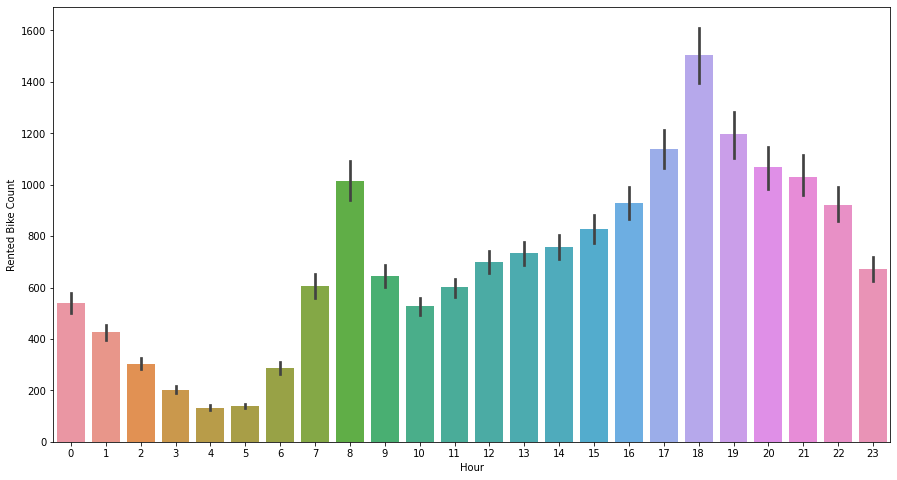

In [13]:
plt.figure(figsize = (15,8))
sns.barplot(df["Hour"], df["Rented Bike Count"])
plt.show()

In [14]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
df.groupby("Functioning Day").sum()["Rented Bike Count"]

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

In [16]:
df.groupby("Holiday").sum()["Rented Bike Count"]

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [17]:
#Removing data of non functional days (non rented days)
dropingindex = list(df[df["Functioning Day"]== "No"].index)
df1 = df.drop(dropingindex)

In [18]:
df1 = df1.drop(["Functioning Day"],axis = 1)

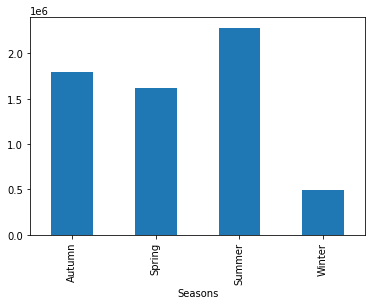

In [19]:
season = df1.groupby("Seasons").sum()["Rented Bike Count"]
season.plot(x="Seasons",y="Rented Bike Count",kind="bar")
plt.show()

In [20]:
df1.shape

(8465, 13)

In [21]:
df.shape

(8760, 14)

In [22]:
dropingindex = list(df[df["Functioning Day"]== "No"].index)


In [23]:
df1.shape

(8465, 13)

In [24]:
#converting the date time string to date type object
df1["Date"] = pd.to_datetime(df1["Date"])

In [25]:
df1["Date"]

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8465, dtype: datetime64[ns]

In [26]:

df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year

In [27]:
df1.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [28]:
df1.Year.unique()

array([2017, 2018])

In [29]:
df1.drop(columns=['Date'],inplace=True)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Seasons                    8465 non-null   object 
 11  Holiday                    8465 non-null   object 
 12  Day                        8465 non-null   int64  
 13  Month                      8465 non-null   int64

In [31]:
#seperating numerical and categorical cou=lumns
numeric_features = list(df1.describe().columns)
cat_features = [i for i in df1.columns if df1[i].dtype == "O"]

In [45]:
print(numeric_features)
cat_features
df1.groupby("Seasons").count()["Rented Bike Count"]

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'Month', 'Year']


Seasons
Autumn    1937
Spring    2160
Summer    2208
Winter    2160
Name: Rented Bike Count, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


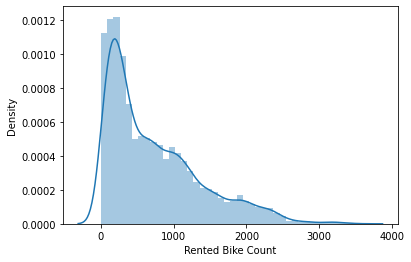

In [33]:
# distribution of dependent variable
sns.distplot(df1["Rented Bike Count"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


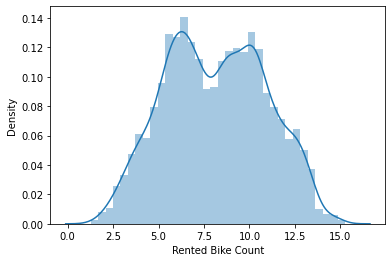

In [34]:
y = np.cbrt(df1["Rented Bike Count"])
sns.distplot(y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

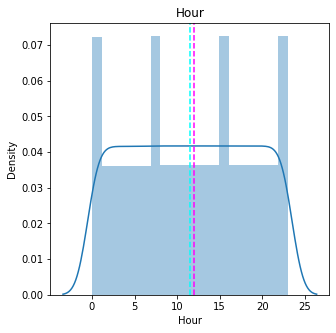

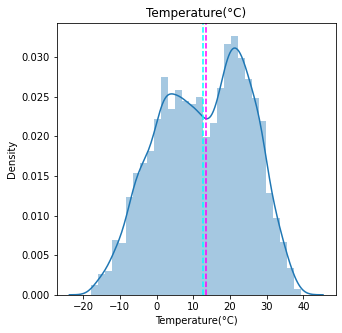

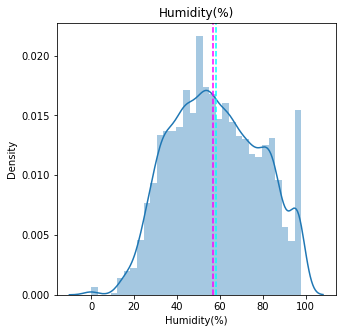

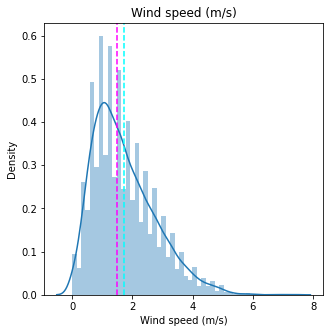

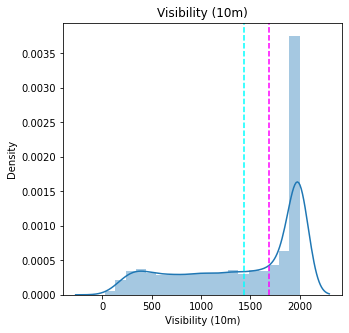

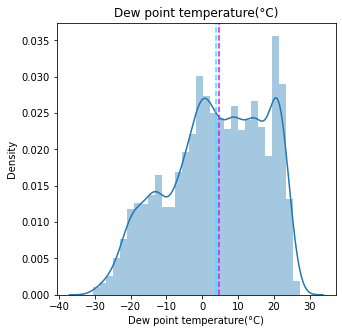

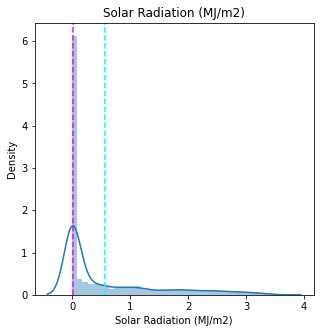

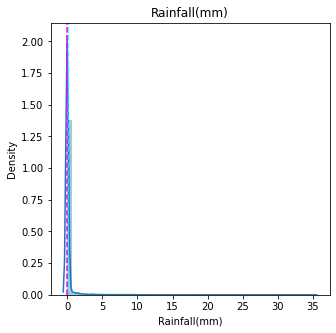

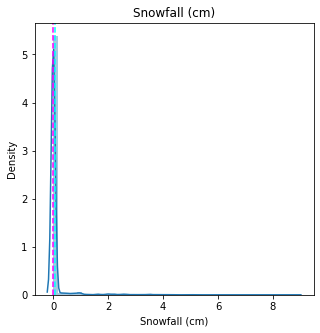

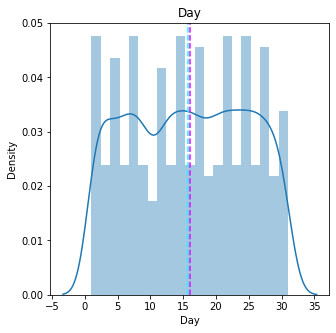

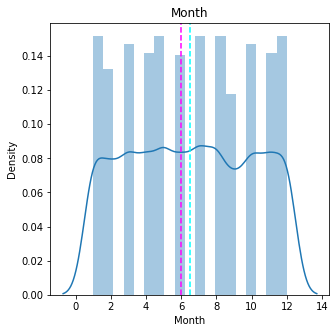

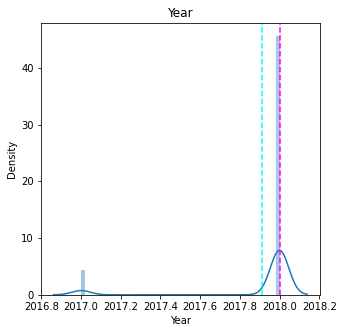

In [35]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(5,5))
  ax = fig.gca()
  feature = df1[col]
  sns.distplot(feature)
  ax.axvline(feature.mean(),color = "cyan",linestyle = "dashed")
  ax.axvline(feature.median(),color = "magenta",linestyle = "dashed")
  ax.set_title(col)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

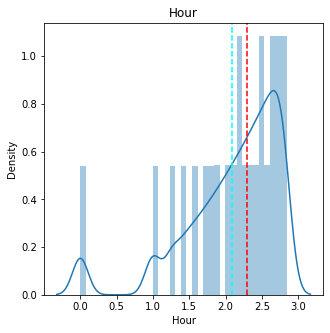

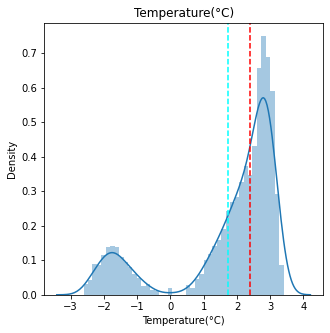

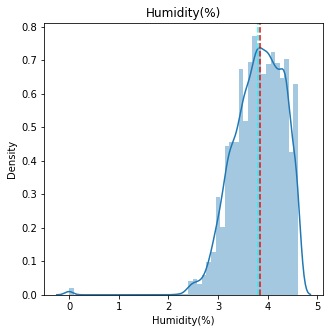

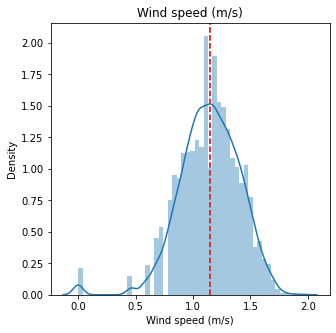

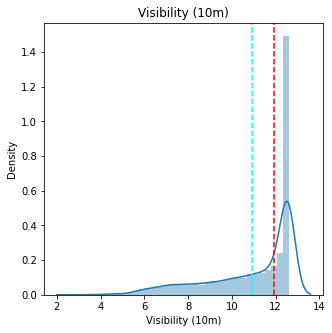

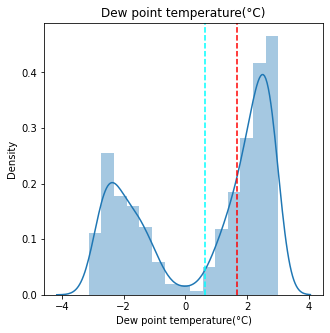

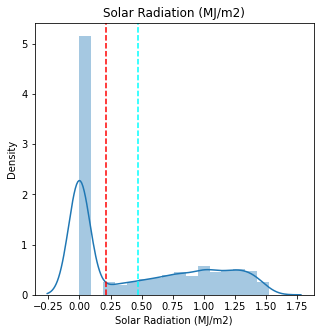

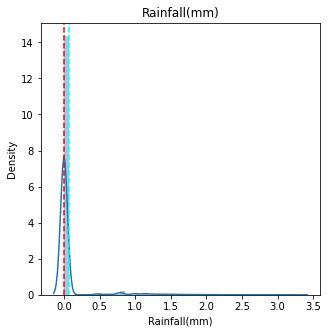

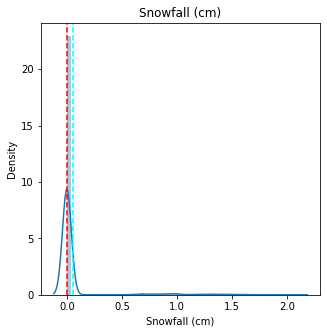

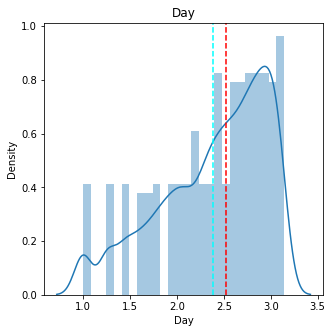

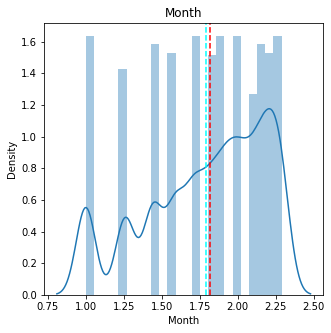

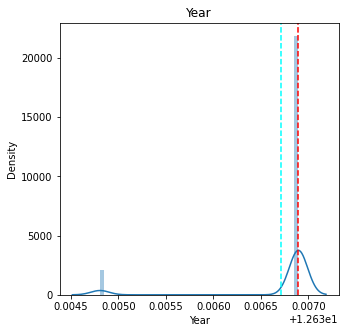

In [36]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (5,5))
  ax = fig.gca()
  fe = np.cbrt(df1[col])
  sns.distplot(fe)
  ax.axvline(fe.mean(),color = "cyan",linestyle="dashed")
  ax.axvline(fe.median(), color = "red",linestyle = "dashed")
  ax.set_title(col)

plt.show()

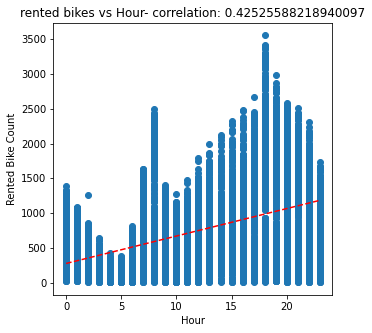

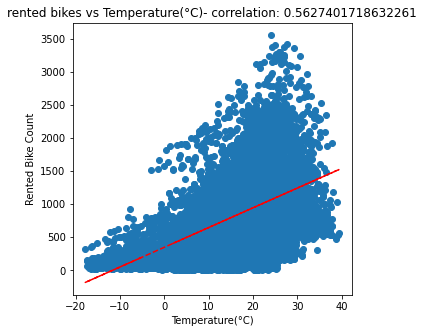

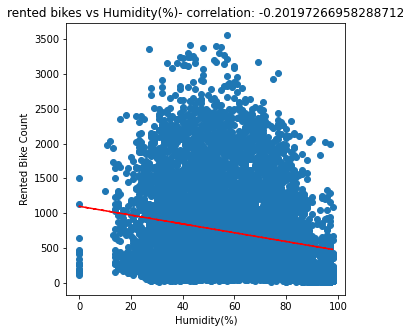

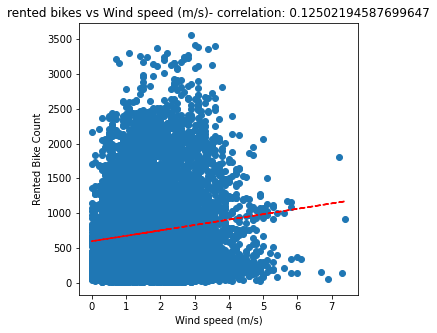

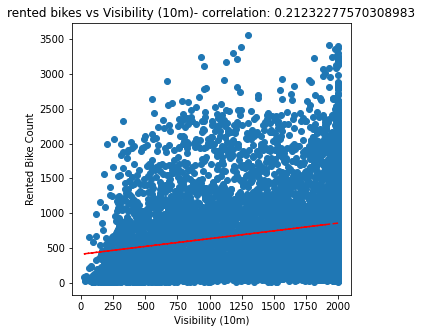

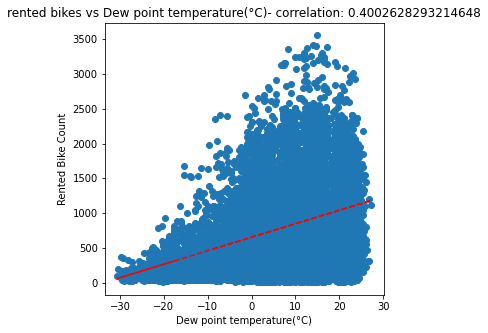

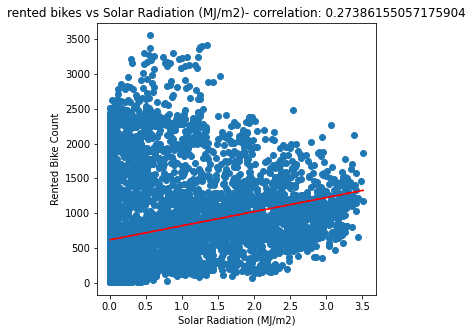

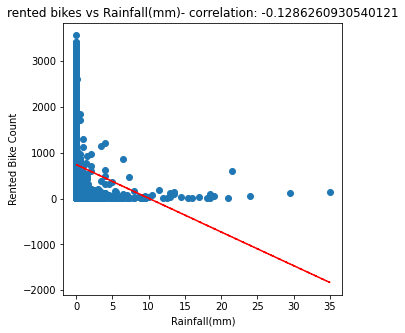

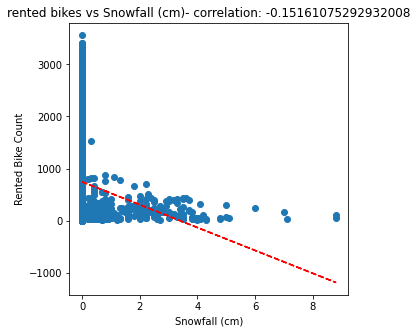

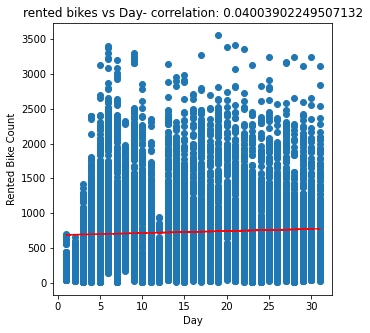

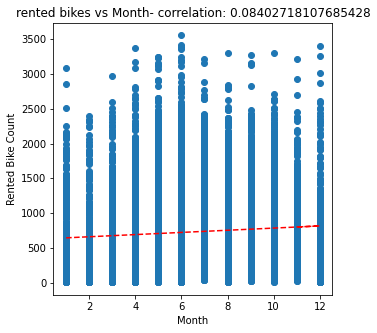

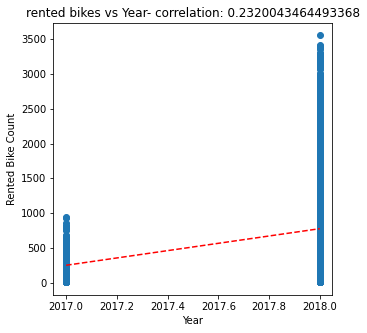

In [37]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(5,5))
  ax = fig.gca()
  feature = df1[col]
  label = df1[numeric_features[0]]
  correlation = feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel("Rented Bike Count")
  ax.set_title('rented bikes vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(feature,label,deg=1)
  y_hat = np.poly1d(z)(df1[col])
  plt.plot(feature,y_hat,"r--")

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

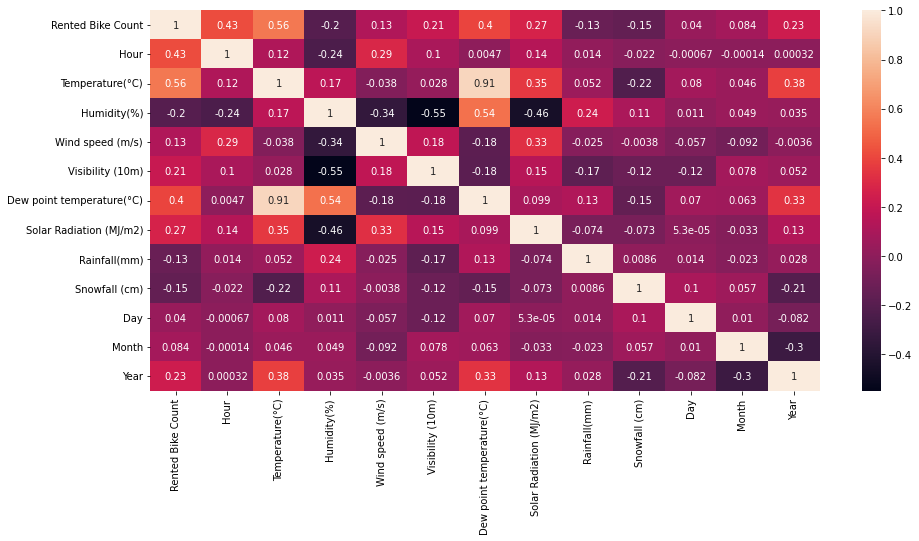

In [38]:
plt.figure(figsize=(15,7))
corr = df1.corr()
sns.heatmap(corr,annot = True)
plt.show

In [50]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
vi_df = calc_vif(df1[numeric_features[1:]])
vi_df

,variables,VIF
0,Hour,4.450425
1,Temperature(°C),185.510084
2,Humidity(%),182.909204
3,Wind speed (m/s),4.866596
4,Visibility (10m),10.737733
5,Dew point temperature(°C),126.862428
6,Solar Radiation (MJ/m2),2.890387
7,Rainfall(mm),1.104193
8,Snowfall (cm),1.154571
9,Day,4.440890


In [53]:
df1 = df1.drop(["Dew point temperature(°C)"],axis=1)


In [57]:
numeric_features = [col for col in df1.columns if df1[col].dtype !="O"]

In [59]:
calc_vif(df1[numeric_features[1:]])

,variables,VIF
0,Hour,4.440749
1,Temperature(°C),3.524414
2,Humidity(%),23.509471
3,Wind speed (m/s),4.859930
4,Visibility (10m),10.674435
5,Solar Radiation (MJ/m2),2.746136
6,Rainfall(mm),1.090794
7,Snowfall (cm),1.149582
8,Day,4.440079
9,Month,4.662932


In [63]:
for col in  cat_features:
  print(f"unique features in {col} are {len(df1[col].unique())}")

unique features in Seasons are 4
unique features in Holiday are 2


In [66]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
df1.groupby("Seasons").sum()["Rented Bike Count"]

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

In [67]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
df1.groupby("Holiday").sum()["Rented Bike Count"]

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

### **EDA for categorical** **values** 



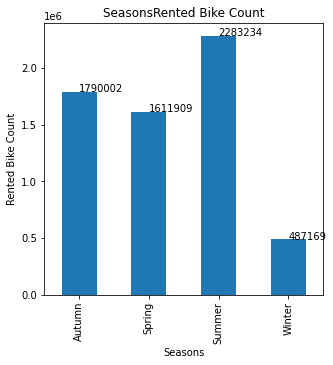

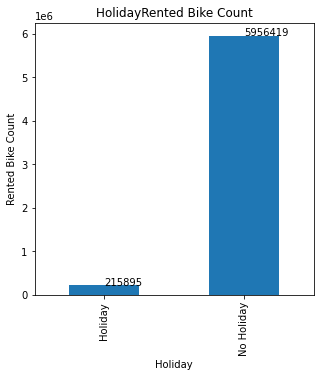

In [80]:
index = 0 
for col in cat_features:
  index += 1
  fig = plt.figure(figsize = (5,5))
  ax = fig.gca()
  df1.groupby(col).sum()["Rented Bike Count"].plot(kind="bar")
  ax.set_title(col + "Rented Bike Count")
  ax.set_xlabel(col)
  ax.set_ylabel("Rented Bike Count")
  for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()))